In [679]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [680]:
df = pd.read_csv('../shiba_v1.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin
2020-08-01,2020-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,1604789,0.000,0.000,0.000000,0.000000,0,0.0,0.00,0.00
2020-08-02,2020-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,193098,0.000,0.000,13.559829,0.217949,0,0.0,0.00,0.00
2020-08-03,2020-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,129225,0.000,0.000,27.119658,0.435897,0,0.0,0.00,0.00
2020-08-04,2020-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,19717,0.000,0.000,40.679487,0.653846,0,0.0,0.00,0.00
2020-08-05,2020-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,26869,0.000,0.000,54.239316,0.871795,0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.000021,0.000022,0.000020,0.000021,0.000021,531285879,6.182,586.182,463670.000000,684.666667,47,6.0,0.06,2.82
2022-02-01,2022-02-01,0.000021,0.000022,0.000021,0.000022,0.000022,519254046,6.800,475.700,463832.000000,630.090909,94,6.0,0.06,5.64
2022-02-02,2022-02-02,0.000022,0.000022,0.000020,0.000021,0.000021,484518640,7.889,499.667,463900.000000,615.700000,100,6.0,0.06,6.00
2022-02-03,2022-02-03,0.000021,0.000021,0.000020,0.000021,0.000021,421850042,8.889,652.556,464046.000000,680.200000,76,6.0,0.06,4.56


<AxesSubplot:>

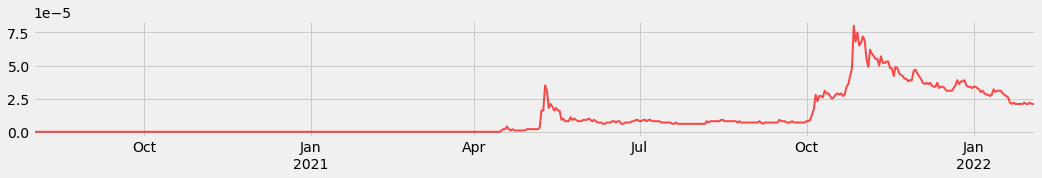

In [681]:
df = df.resample('D').ffill()
df.Close.plot(figsize=(16, 2), color="red", label='Close price', lw=2, alpha =.7)

In [682]:
future_days = 1
columnName = str(future_days)+'_day_price_forecast'

In [683]:
#added new column
df[columnName] = df[['Close']].shift(-future_days)

df[['Close', columnName]]

,Close,1_day_price_forecast
2020-08-01,0.000000,0.000000
2020-08-02,0.000000,0.000000
2020-08-03,0.000000,0.000000
2020-08-04,0.000000,0.000000
2020-08-05,0.000000,0.000000
...,...,...
2022-01-31,0.000021,0.000022
2022-02-01,0.000022,0.000021
2022-02-02,0.000021,0.000021
2022-02-03,0.000021,0.000021


In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2020-08-01 to 2022-02-04
Freq: D
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         553 non-null    object 
 1   Open                         553 non-null    float64
 2   High                         553 non-null    float64
 3   Low                          553 non-null    float64
 4   Close                        553 non-null    float64
 5   Adj Close                    553 non-null    float64
 6   Volume                       553 non-null    int64  
 7   reddit_average_posts_48h     553 non-null    float64
 8   reddit_average_comments_48h  553 non-null    float64
 9   reddit_subscribers           553 non-null    float64
 10  reddit_accounts_active_48h   553 non-null    float64
 11  shiba inu coin_unscaled      553 non-null    int64  
 12  shiba inu coin_monthly       553 non-null    float6

In [685]:
X = np.array(df[["High", "Low", "Volume", "Open","Close", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']])


print(df.shape)

X = X[:df.shape[0] - future_days]
print(X)

(553, 16)
[[0.00000000e+00 0.00000000e+00 1.60478900e+06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.93098000e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.29225000e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.20000000e-05 2.10000000e-05 5.19254046e+08 ... 6.00000000e+00
  6.00000000e-02 5.64000000e+00]
 [2.20000000e-05 2.00000000e-05 4.84518640e+08 ... 6.00000000e+00
  6.00000000e-02 6.00000000e+00]
 [2.10000000e-05 2.00000000e-05 4.21850042e+08 ... 6.00000000e+00
  6.00000000e-02 4.56000000e+00]]


In [686]:
y = np.array(df[columnName])
y = y[:-future_days]
print(y)

[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.

In [687]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

In [688]:
from sklearn.preprocessing import StandardScaler


StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(x_train)
y_p = StdS_y.fit_transform(y_train.reshape(-1,1))

print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)

Scaled X_l:
[[-0.60471228 -0.6424204  -0.28349436 ... -0.47071667 -0.47071667
  -0.37394735]
 [-0.60471228 -0.6424204  -0.28422527 ... -0.47071667 -0.47071667
  -0.37394735]
 [-0.60471228 -0.6424204  -0.28425834 ... -0.47071667 -0.47071667
  -0.37394735]
 ...
 [ 4.08712741  4.88167922  1.31150996 ...  1.93301252  1.93301252
   0.15417535]
 [ 3.93577774  4.68438995  1.12763528 ...  1.93301252  1.93301252
   0.15417535]
 [ 3.48172874  3.89523286  1.84947102 ...  1.93301252  1.93301252
   0.0729257 ]]
Scaled y_p:
[[-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0.62084482]
 [-0

In [689]:
StdS_X_test = StandardScaler()
StdS_y_test = StandardScaler()

X_l_test = StdS_X_test.fit_transform(x_test)
y_p_test = StdS_y_test.fit_transform(y_test.reshape(-1,1))

print("Scaled X_l_test:")
print(X_l_test)
print("Scaled y_p_test:")
print(y_p_test)

Scaled X_l_test:
[[-0.91553238 -0.94564791 -0.2722563  ...  0.16073665  0.16073665
  -0.60324702]
 [-0.78021401 -1.03582567 -0.19060441 ... -0.05319342 -0.05319342
  -0.6188526 ]
 [-0.71255483 -0.85547014  0.11340365 ... -0.05319342 -0.05319342
  -0.56891475]
 ...
 [-1.2538283  -1.30635896 -0.52682951 ... -0.65219762 -0.65219762
  -0.39163537]
 [-1.2538283  -1.39653673 -0.5333701  ... -0.65219762 -0.65219762
  -0.36916333]
 [-1.32148748 -1.39653673 -0.54517045 ... -0.65219762 -0.65219762
  -0.45905147]]
Scaled y_p_test:
[[-0.75773637]
 [-0.6811346 ]
 [-0.75773637]
 [-0.6811346 ]
 [-0.83433813]
 [-0.75773637]
 [-0.29812578]
 [-0.14492226]
 [ 0.31468833]
 [ 0.77429891]
 [ 3.22555536]
 [ 2.30633419]
 [ 2.84254654]
 [ 2.0765289 ]
 [ 2.22973242]
 [ 2.61274124]
 [ 2.38293595]
 [ 1.31051126]
 [ 0.85090067]
 [ 1.84672361]
 [ 1.61691831]
 [ 1.46371479]
 [ 1.31051126]
 [ 1.31051126]
 [ 0.92750244]
 [ 1.46371479]
 [ 1.08070597]
 [ 1.08070597]
 [ 1.15730773]
 [ 1.15730773]
 [ 0.77429891]
 [ 0.7742

In [690]:
from sklearn.svm import SVR
svr_sigmoid = SVR(kernel='sigmoid', C = 0.032, epsilon=0.00002, coef0 = 0.75, tol = 0.05)

svr_sigmoid.fit(X_l, y_p)

C:\Users\nikol\Desktop\SIAP - projekat\SIAP_2022\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.032, coef0=0.75, epsilon=2e-05, kernel='sigmoid', tol=0.05)

In [691]:
svr_linear_confidence = svr_sigmoid.score(X_l_test, y_p_test)
print('svr_linear confidence', svr_linear_confidence)

svr_linear confidence 0.7603442465468717


In [692]:
svr_prediction = svr_sigmoid.predict(X_l_test)
print(svr_prediction)

[-0.5854767  -0.6449434  -0.46556213 -0.51092692 -0.55861463 -0.55632255
 -0.61172508 -0.24188944  0.98142712  1.04762924  1.08077361  0.97743829
  1.11397016  1.23598371  1.27848718  1.16661702  0.64678502  0.77128112
  0.81116024  0.61299982  0.83964312  0.90637084  0.89014344  0.85589386
  0.8605073   0.85102811  0.89077833  0.89300859  0.84437256  0.88320026
  0.86273917  0.81963108  0.7714175   0.70535672  0.73802154  0.75525635
  0.62436872  0.56515852  0.50020689  0.40108459  0.54528886  0.42551728
  0.35724225  0.19617094  0.35959457  0.76711595  0.50850322  0.4441904
  0.41853872  0.25553241  0.00869281 -0.00152305  0.01537228 -0.07677603
 -0.11611396 -0.17393125 -0.25480691 -0.10554349 -0.14343215 -0.21193363
 -0.21516994 -0.211521   -0.36922994 -0.3901066  -0.44272433 -0.38186798
 -0.33428826 -0.10588547  0.00519124  0.07144147 -0.01119209 -0.06393189
 -0.02361398 -0.12739335 -0.32826598 -0.34304053 -0.28268354 -0.3729391
 -0.3523706  -0.36017542 -0.39319877 -0.4982973  -0.4

In [693]:
final_prediction =svr_prediction.reshape(-1,1)
final_prediction = StdS_y_test.inverse_transform(final_prediction)
print(final_prediction)

[[3.02487690e-05]
 [2.94724592e-05]
 [3.18141972e-05]
 [3.12219812e-05]
 [3.05994406e-05]
 [3.06293626e-05]
 [2.99061087e-05]
 [3.47341390e-05]
 [5.07039614e-05]
 [5.15681989e-05]
 [5.20008831e-05]
 [5.06518890e-05]
 [5.24342484e-05]
 [5.40270779e-05]
 [5.45819408e-05]
 [5.31215284e-05]
 [4.63353662e-05]
 [4.79606042e-05]
 [4.84812073e-05]
 [4.58943163e-05]
 [4.88530379e-05]
 [4.97241369e-05]
 [4.95122959e-05]
 [4.90651837e-05]
 [4.91254100e-05]
 [4.90016636e-05]
 [4.95205840e-05]
 [4.95496990e-05]
 [4.89147785e-05]
 [4.94216559e-05]
 [4.91545460e-05]
 [4.85917902e-05]
 [4.79623845e-05]
 [4.70999922e-05]
 [4.75264160e-05]
 [4.77514084e-05]
 [4.60427318e-05]
 [4.52697706e-05]
 [4.44218576e-05]
 [4.31278625e-05]
 [4.50103815e-05]
 [4.34468199e-05]
 [4.25555214e-05]
 [4.04528113e-05]
 [4.25862299e-05]
 [4.79062298e-05]
 [4.45301622e-05]
 [4.36905887e-05]
 [4.33557181e-05]
 [4.12277473e-05]
 [3.80053724e-05]
 [3.78720091e-05]
 [3.80925697e-05]
 [3.68896170e-05]
 [3.63760788e-05]
 [3.562130

In [694]:
print(y_test)

[2.8e-05 2.9e-05 2.8e-05 2.9e-05 2.7e-05 2.8e-05 3.4e-05 3.6e-05 4.2e-05
 4.8e-05 8.0e-05 6.8e-05 7.5e-05 6.5e-05 6.7e-05 7.2e-05 6.9e-05 5.5e-05
 4.9e-05 6.2e-05 5.9e-05 5.7e-05 5.5e-05 5.5e-05 5.0e-05 5.7e-05 5.2e-05
 5.2e-05 5.3e-05 5.3e-05 4.8e-05 4.8e-05 4.2e-05 4.9e-05 4.8e-05 4.4e-05
 4.3e-05 4.2e-05 4.0e-05 4.0e-05 3.8e-05 3.9e-05 3.9e-05 4.6e-05 4.7e-05
 4.4e-05 4.2e-05 4.0e-05 3.7e-05 3.6e-05 3.7e-05 3.6e-05 3.7e-05 3.5e-05
 3.4e-05 3.4e-05 3.7e-05 3.3e-05 3.4e-05 3.4e-05 3.3e-05 3.1e-05 3.1e-05
 3.1e-05 3.1e-05 3.3e-05 3.5e-05 3.9e-05 3.6e-05 3.8e-05 3.8e-05 3.9e-05
 3.5e-05 3.4e-05 3.4e-05 3.3e-05 3.4e-05 3.4e-05 3.3e-05 3.2e-05 3.0e-05
 3.1e-05 2.9e-05 2.8e-05 2.8e-05 2.7e-05 2.8e-05 3.2e-05 3.0e-05 3.1e-05
 3.1e-05 3.1e-05 2.9e-05 2.8e-05 2.7e-05 2.6e-05 2.2e-05 2.1e-05 2.2e-05
 2.1e-05 2.1e-05 2.1e-05 2.1e-05 2.1e-05 2.2e-05 2.1e-05 2.1e-05 2.2e-05
 2.1e-05 2.1e-05 2.1e-05]


In [695]:
print(len(final_prediction))
print(len(y_test))

111
111


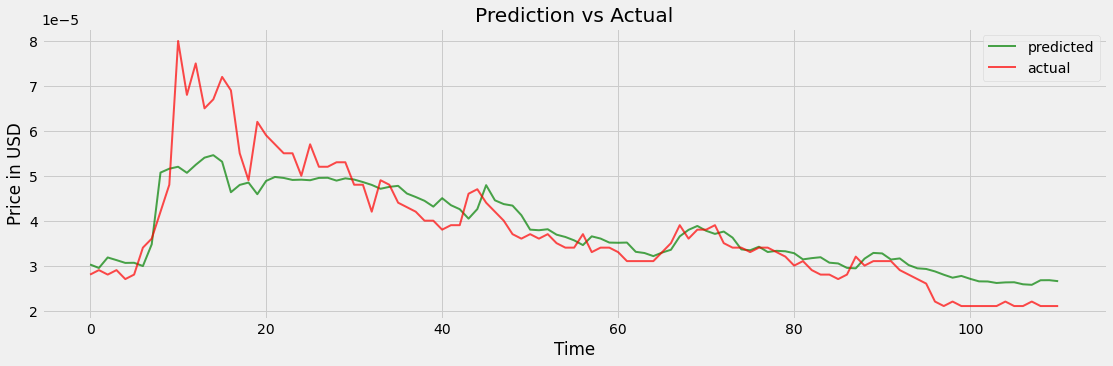

In [696]:
plt.figure(figsize=(17,5))
plt.plot(final_prediction, label='Prediction', lw=2, alpha =.7, color = "green")
plt.plot(y_test, label='Actual', lw=2, alpha =.7, color = "red")
plt.legend(['predicted', "actual"])
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')

plt.show()

In [697]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


print("R^2")
print(svr_linear_confidence)

print("\nMAE")
print(mean_absolute_error(y_test,final_prediction))

print("\nRMSE")
print(sqrt(mean_squared_error(y_test, final_prediction)))

R^2
0.7603442465468717

MAE
4.324567009784188e-06

RMSE
6.390799016058093e-06
